In [ ]:
from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile
import lightkurve as lk
import matplotlib.pyplot as plt

tpf = 
tpf

ValueError: File C:\Users\Preston\Desktop\Python\Exoplanet Search\Downloaded_data\MAST_2025-02-24T2216\MAST_2025-02-24T2216\HLSP\hlsp_qlp_tess_ffi_s0054-0000000348822982_tess_v01_llc\hlsp_qlp_tess_ffi_s0054-0000000348822982_tess_v01_llc.fits does not have a FLUX column, is this a target pixel file?

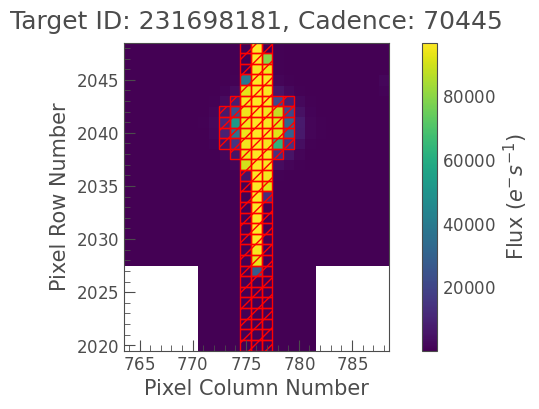

In [10]:
tpf.plot(aperture_mask=tpf.pipeline_mask)
plt.show()

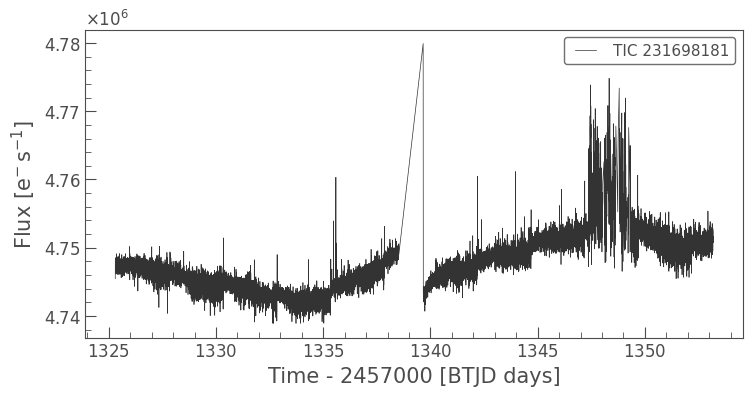

In [11]:
lc=tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc.plot()
plt.show()

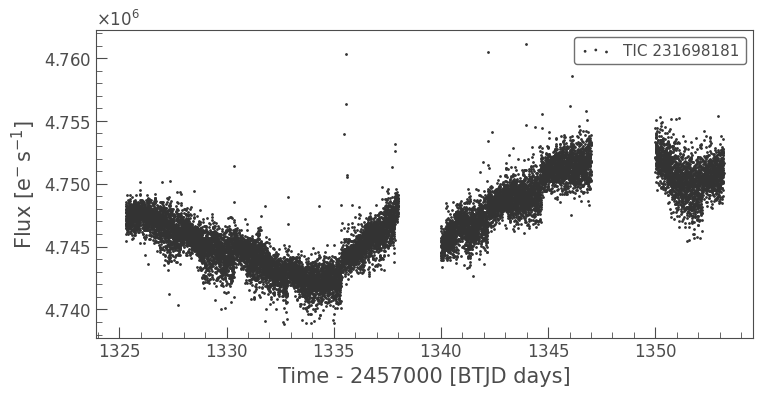

In [12]:
jd_time = lc.time.jd
mask = ((jd_time < (2457000+1338)) | (jd_time > (2457000+1340)))&((jd_time < (2457000+1347)) | (jd_time > (2457000+1350)))
masked_lc = lc[mask]

masked_lc.scatter()
plt.show()

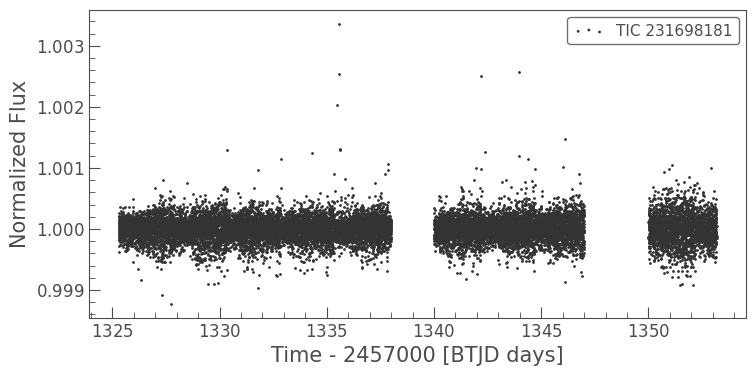

In [ ]:
flat_lc = masked_lc.flatten()
flat_lc.scatter()
plt.show()

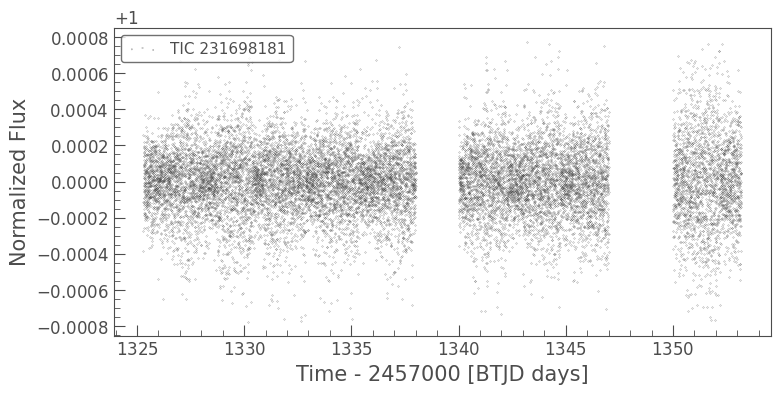

In [23]:
clipped_lc = flat_lc.remove_outliers(sigma=4)
clipped_lc.scatter(s=0.1)
plt.show()

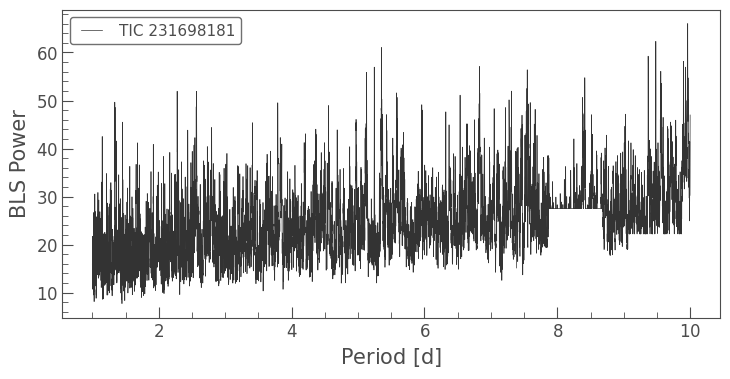

In [24]:
import numpy as np
periodogram = clipped_lc.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot()
plt.show()

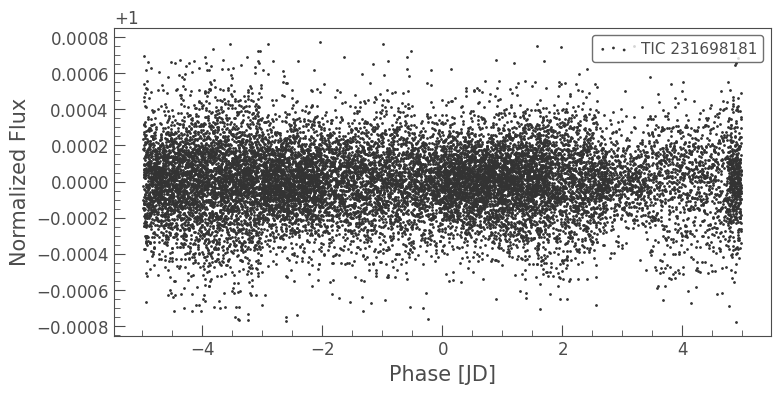

In [25]:
best_fit_period = periodogram.period_at_max_power
folded_lc = clipped_lc.fold(period=best_fit_period)
folded_lc.scatter()
plt.show()

C:\Users\Preston\AppData\Local\Temp\ipykernel_24616\4086967067.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


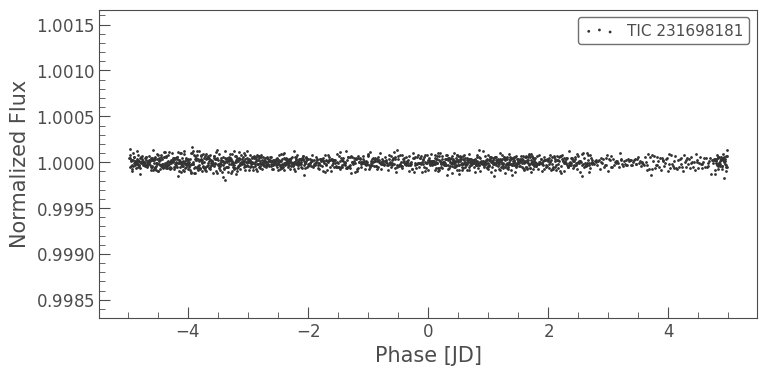

In [26]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.scatter()
plt.ylim([min(binned_lc.flux) - 0.0015, max(binned_lc.flux) + 0.0015])
plt.show()